<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/image_inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

test = load_dataset("SIAKAM/inpainting_test")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

0_2787.png:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

0_10655.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

0_7851.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

0_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

0_11491.png:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

1_11491.png:   0%|          | 0.00/2.05M [00:00<?, ?B/s]

0_10689.png:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

0_3012.png:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

1_10655.png:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

0_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

1_11920.png:   0%|          | 0.00/2.03M [00:00<?, ?B/s]

0_12510.png:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

0_17023.png:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

1_10689.png:   0%|          | 0.00/2.04M [00:00<?, ?B/s]

1_12510.png:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

1_17023.png:   0%|          | 0.00/2.14M [00:00<?, ?B/s]

1_2787.png:   0%|          | 0.00/2.08M [00:00<?, ?B/s]

2_10689.png:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

1_3012.png:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

2_12510.png:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

2_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

1_7851.png:   0%|          | 0.00/2.00M [00:00<?, ?B/s]

1_28588.png:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

2_17023.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

2_11491.png:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

2_2787.png:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

3_10655.png:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2_10655.png:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

2_7851.png:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

3_10689.png:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

2_3012.png:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

3_11491.png:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

3_11920.png:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

3_12510.png:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

3_28588.png:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

3_3012.png:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

test/metadata.jsonl:   0%|          | 0.00/200 [00:00<?, ?B/s]

3_7851.png:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

3_2787.png:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

3_17023.png:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

train/metadata.jsonl:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Print basic information about the dataset
print("Dataset structure:")
print(ds)

# Inspect the first few items in the training set
print("\nFirst few items in the training set:")
for i, item in enumerate(ds['train'].take(5)):
    print(f"Item {i}:")
    for key, value in item.items():
        if key == 'image':
            print(f"  {key}: <PIL.Image.Image image mode={value.mode} size={value.size}>")
        else:
            print(f"  {key}: {value}")
    print()

# Get all column names (attributes)
column_names = list(ds['train'].features.keys())
print("\nColumn names:")
print(column_names)

# Convert a small subset of the dataset to a pandas DataFrame for easier inspection
df = pd.DataFrame(ds['train'].select(range(100)))
print("\nDataFrame head:")
print(df.head())

# Print data types of columns
print("\nColumn data types:")
print(df.dtypes)

README.md:   0%|          | 0.00/224 [00:00<?, ?B/s]

(…)-00000-of-00003-30fbdf94a5d8e722.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00001-of-00003-74b418aa7a721747.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00002-of-00003-4f9459a488896f53.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/202599 [00:00<?, ? examples/s]

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})

First few items in the training set:
Item 0:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 1:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 2:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 3:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 4:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>


Column names:
['image']

DataFrame head:
                                               image
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...

Column data types:
image    object
dtype: object


In [ ]:
# Check the keys (splits) in the dataset
print(ds)

# Print first example to understand the structure
print(ds['train'][0])

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EBAF6FDC60>}


In [ ]:
# Check dataset size
print(f"Train set size: {len(ds['train'])}")
print(f"Validation set size: {len(ds['validation']) if 'validation' in ds else 'Not Available'}")
print(f"Test set size: {len(ds['test']) if 'test' in ds else 'Not Available'}")


Train set size: 202599
Validation set size: Not Available
Test set size: Not Available


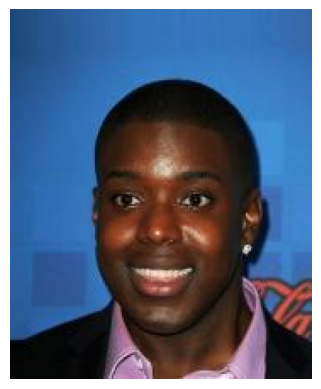

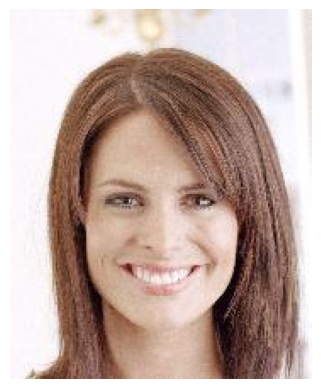

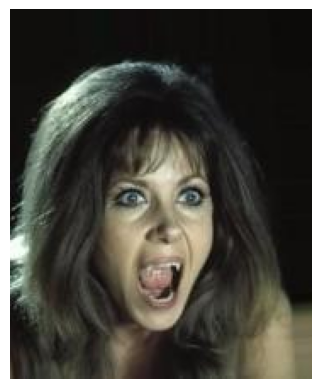

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def show_random_image(dataset):
    # Select a random index
    idx = random.randint(0, len(dataset) - 1)
    # Extract image and its corresponding label/metadata
    # The 'image' key already contains a PIL Image object
    img = dataset[idx]['image']
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show a few random images from the dataset
for _ in range(3):
    show_random_image(ds['train'])

In [ ]:
# Check image size of the first image in the train set
image_size = ds['train'][0]['image'].size
print(f"Image size: {image_size}")

Image size: (178, 218)


In [ ]:
from torchvision import transforms

# Define transformations: resizing and normalizing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128 pixels
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Apply transformation to a sample image
transformed_img = transform(ds['train'][0]['image'])

# Check transformed image shape and type
print(f"Transformed image shape: {transformed_img.shape}")


Transformed image shape: torch.Size([3, 128, 128])


In [ ]:
# Check labels or metadata (if available)
if 'label' in ds['train'].features:
    labels = [example['label'] for example in ds['train']]
    # Count occurrences of each label
    unique_labels = set(labels)
    print(f"Unique labels: {unique_labels}")
    print(f"Label distribution: {dict(zip(unique_labels, [labels.count(label) for label in unique_labels]))}")
else:
    print("No explicit labels found in the dataset.")


No explicit labels found in the dataset.


In [ ]:
# Check available keys in the dataset
print(ds)


DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})


In [ ]:
# Load dataset in streaming mode (without fully loading it into memory)
ds = load_dataset("saitsharipov/CelebA-HQ", streaming=True)

# Check the first batch of examples
for batch in ds['train'].take(5):  # Adjust the split name if necessary
    print(batch)


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EA96AA1C30>}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EA96AA0B20>}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EA96AA09A0>}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EA96AA1000>}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x79EA96AA2260>}


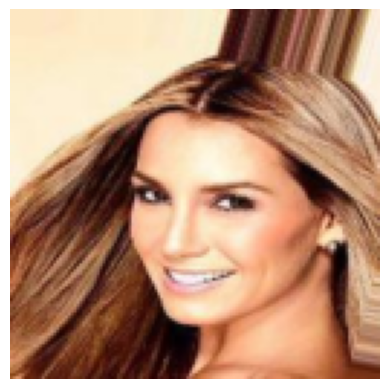

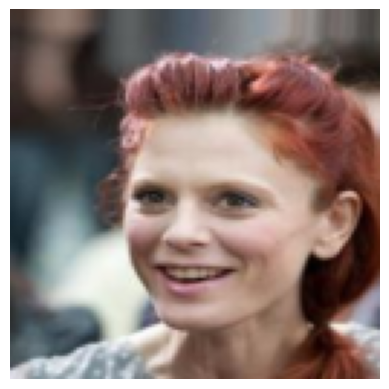

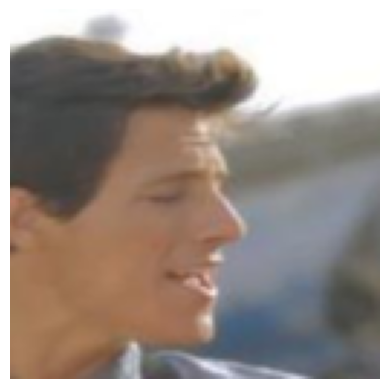

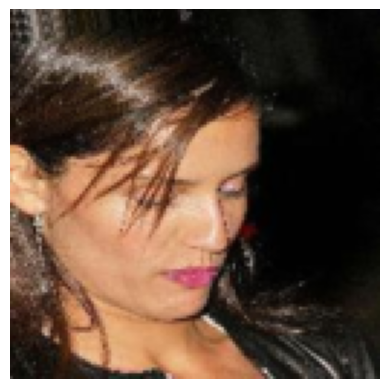

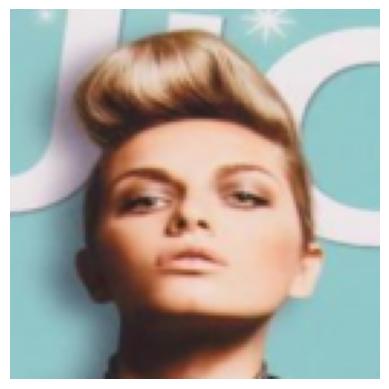

In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Stream and process data in batches (this won't load the whole dataset into memory)
def process_batch(dataset, num_samples=5):
    count = 0
    for sample in dataset:
        if count >= num_samples:
            break
        # Apply transformation to image
        img = transform(sample['image'])
        # Denormalize the image to display it correctly
        img = img / 2 + 0.5  # Rescale to [0, 1]
        img = img.permute(1, 2, 0).numpy()  # Convert to numpy array and change channels order

        plt.imshow(img)
        plt.axis('off')
        plt.show()
        count += 1

# Process a batch of 5 images
process_batch(ds['train'])


In [ ]:
import itertools
from PIL import Image

# Define the total number of rows and split ratio
total_rows = 202599  # Total images in your dataset
split_ratio = 0.8

# Compute the number of rows for train and test
train_size = int(total_rows * split_ratio)
test_size = total_rows - train_size

# Function to split the dataset using islice
def get_train_test_splits(dataset, train_size, test_size):
    # Get training data
    train_data = itertools.islice(dataset, train_size)
    # Get testing data (starting after train_size to the end)
    test_data = itertools.islice(dataset, train_size, train_size + test_size)
    return train_data, test_data

# Split the dataset
train_dataset, test_dataset = get_train_test_splits(ds['train'], train_size, test_size)

# Convert the first few examples to a list and show images
train_examples = list(itertools.islice(train_dataset, 5))  # Take first 5 train samples
test_examples = list(itertools.islice(test_dataset, 5))  # Take first 5 test samples

# Display train images
for i, example in enumerate(train_examples):
    print(f"Train Image {i + 1}:")
    example['image'].show()

# Display test images
for i, example in enumerate(test_examples):
    print(f"Test Image {i + 1}:")
    example['image'].show()


Train Image 1:
Train Image 2:
Train Image 3:
Train Image 4:
Train Image 5:
Test Image 1:
Test Image 2:
Test Image 3:
Test Image 4:
Test Image 5:


Train Image 1:


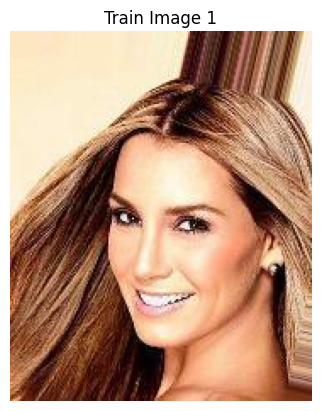

Train Image 2:


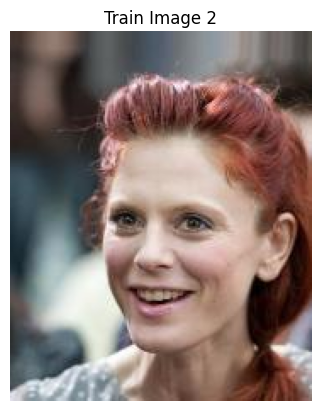

Train Image 3:


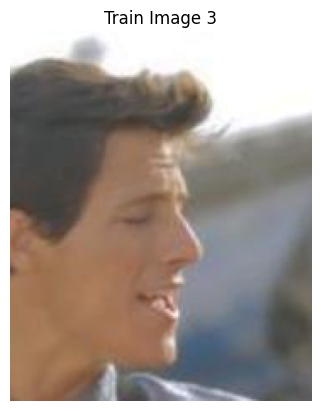

Train Image 4:


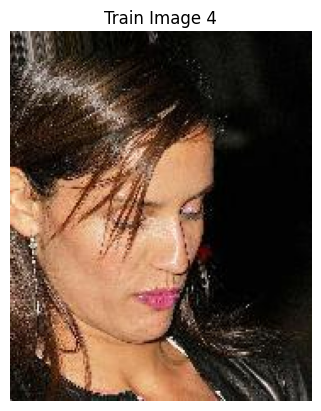

Train Image 5:


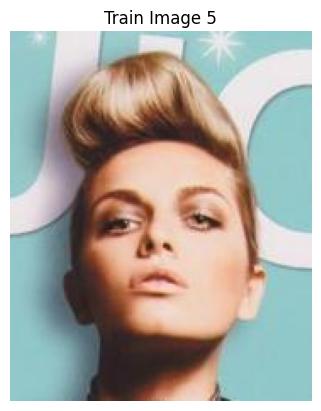

NameError: name 'shard_examples' is not defined

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Helper function to display an image inline
def display_image(image, title=None):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')  # Hide axis for better display
    plt.show()

# Display train images
for i, example in enumerate(train_examples):
    print(f"Train Image {i + 1}:")
    display_image(example['image'], title=f"Train Image {i + 1}")

# Display shard images
for i, example in enumerate(shard_examples):
    print(f"Shard Image {i + 1}:")
    display_image(example['image'], title=f"Shard Image {i + 1}")
